# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')




train_data = pd.read_csv('/Users/nikli/Documents/git_reps/Data/orange_small_churn_data.txt')
train_labels = pd.read_csv('/Users/nikli/Documents/git_reps/Data/orange_small_churn_labels.txt',names = ['Labels'])
train_data['Labels']=train_labels['Labels']
train_labels.head()

,Labels
0,-1
1,-1
2,-1
3,1
4,-1


2\. Рассчитайте доли классов `отток` и `не отток`.

In [11]:
train_labels['Labels'].value_counts(normalize = True)

-1    0.9256
 1    0.0744
Name: Labels, dtype: float64

In [12]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
categorical_ = list(set(cols) - set(num_cols))

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [13]:
train_data.corrwith(train_labels['Labels'],axis = 0).abs().dropna().sort_values()[-10:]

Var73     0.069550
Var7      0.072437
Var19     0.074202
Var111    0.076956
Var53     0.079045
Var188    0.095238
Var131    0.096202
Var189    0.122501
Var168    0.135305
Labels    1.000000
dtype: float64

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [22]:
top_20_variables = train_data.corrwith(train_labels['Labels'],axis = 0).abs().dropna().sort_values()[-20:].index
top_20_variables=top_20_variables[:-1]

Распределения в разрезе классов

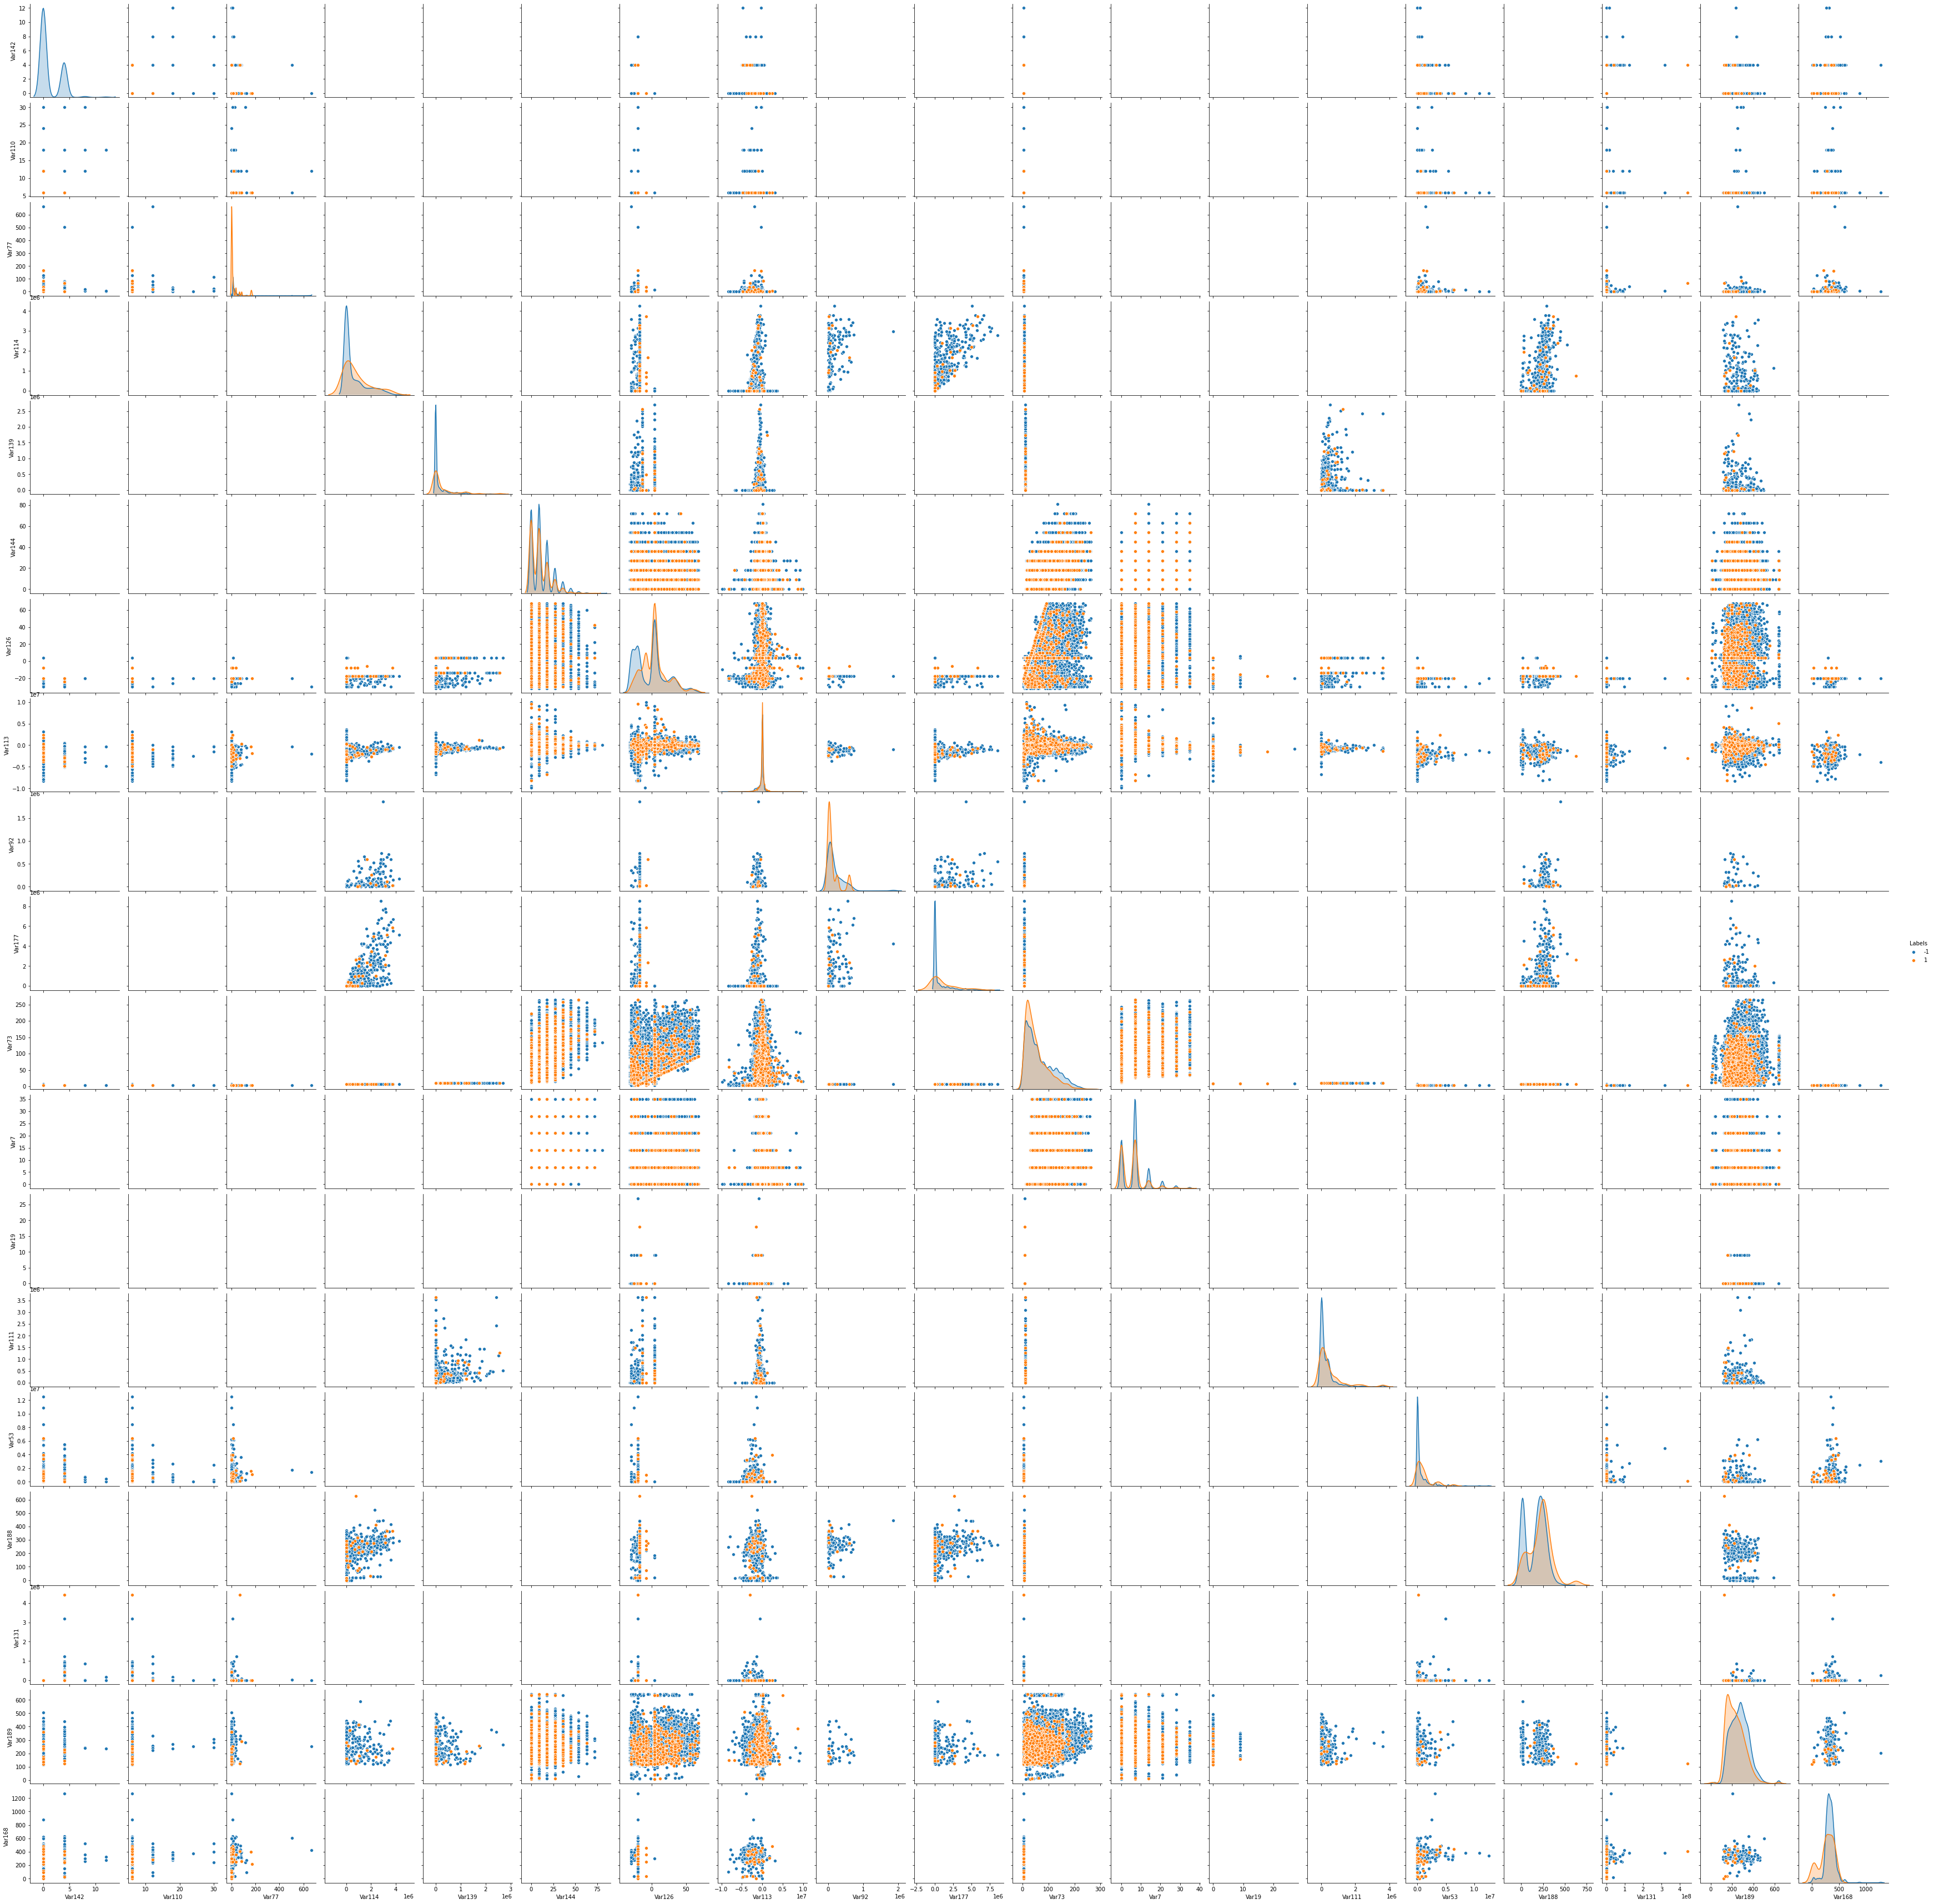

In [18]:
sns.pairplot(train_data[top_20_variables], hue='Labels',palette = sns.hls_palette(2, l=.3, s=.7));

Отобразите объекты в координатах пар признаков

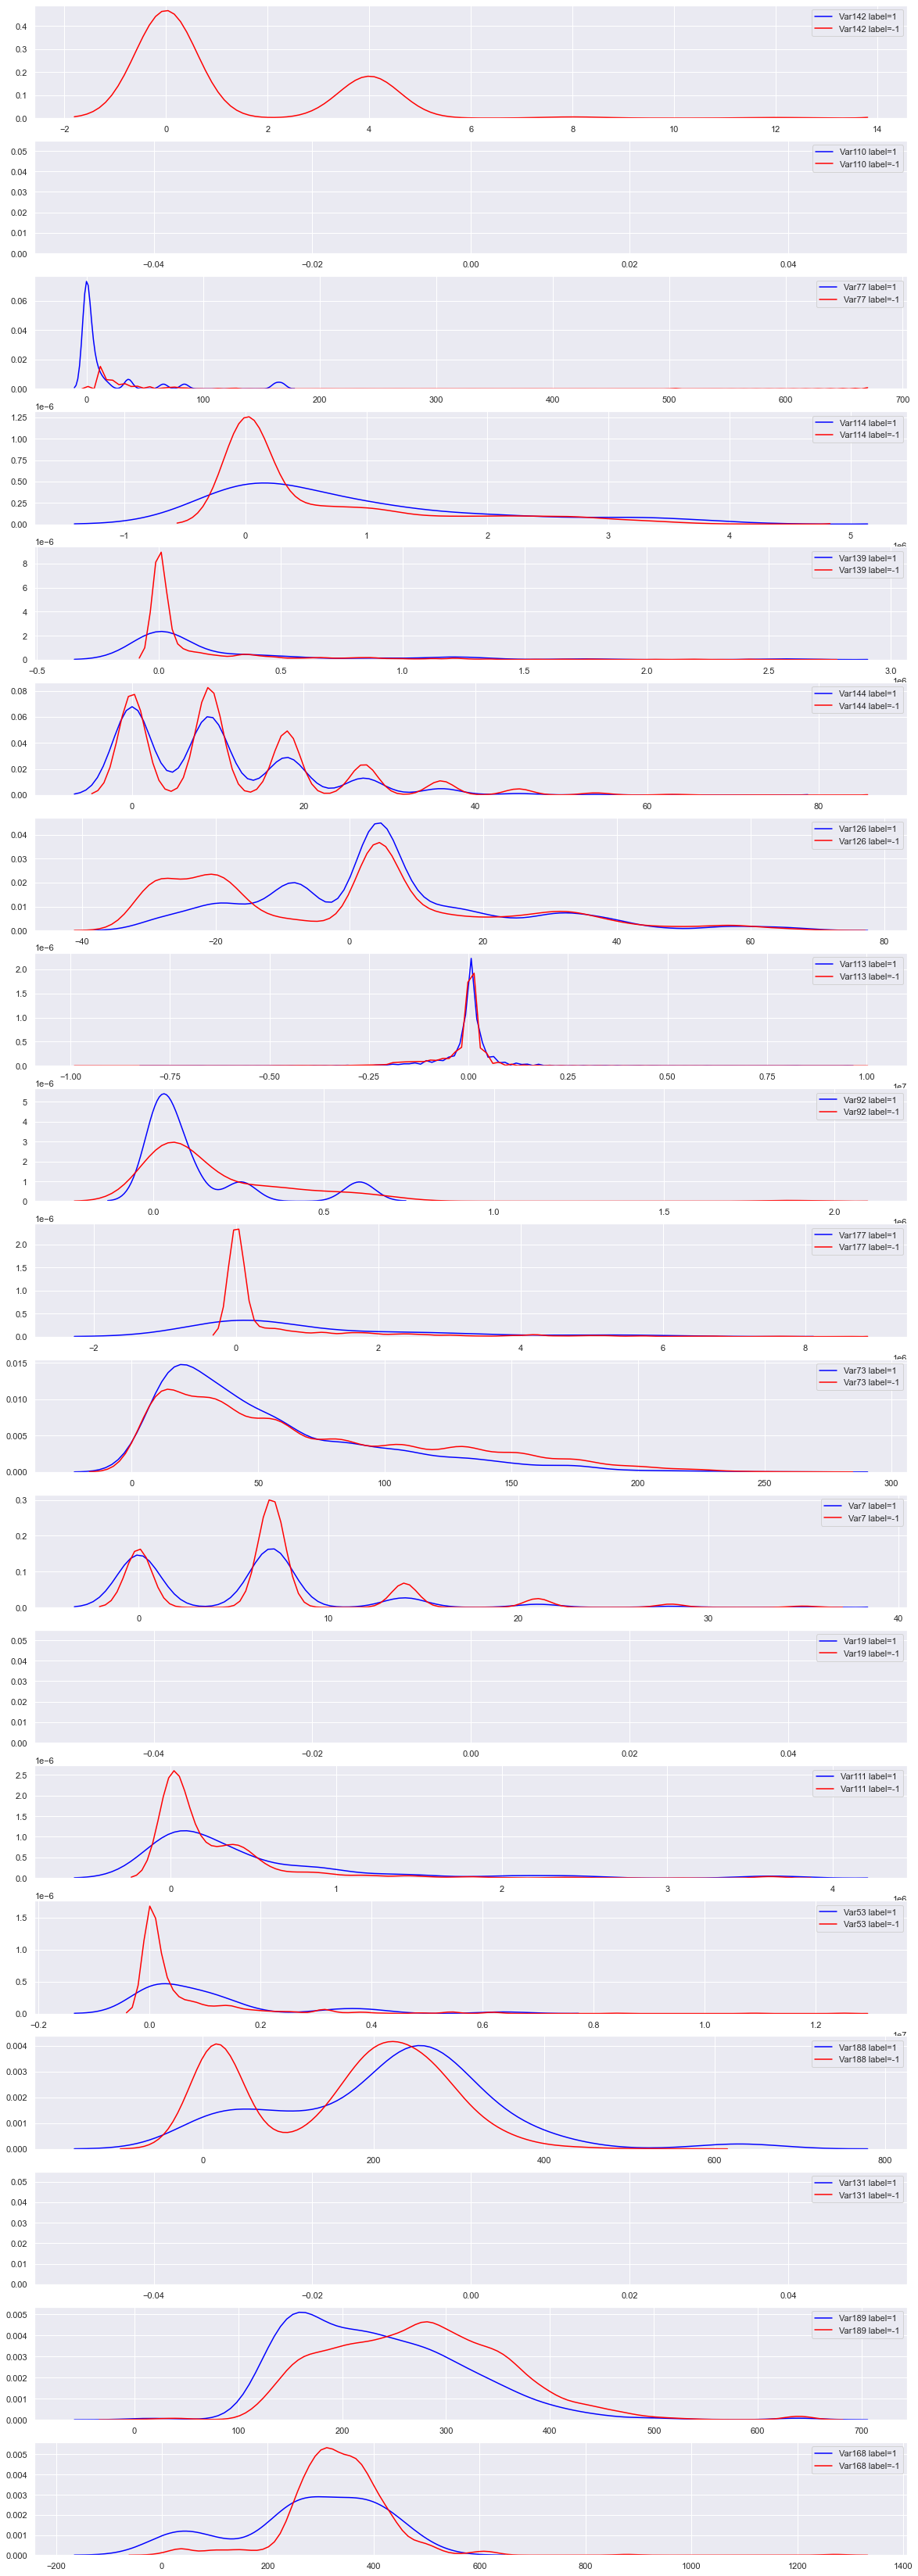

In [34]:
fig, axs=plt.subplots(19, figsize=(20, 60))
# fig, axs = plt.subplots(10, figsize = (20,60))

sns.set(color_codes=True)
for ax, columns in zip(axs, top_20_variables):
    sns.kdeplot(train_data[columns][train_data['Labels'] == 1], ax=ax, color='blue', label=str(columns)+" label=1")
    sns.kdeplot(train_data[columns][train_data['Labels'] == -1], ax=ax, color='red', label=str(columns)+" label=-1")

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [58]:
def analyze_cols(num_params, array_cols, train_data):
    print(train_data[array_cols].corrwith(train_labels['Labels'],axis = 0).abs().dropna()[-num_params:])
    array_cols.append("Labels")
    
    
    top_n_variables = train_data[array_cols].corrwith(train_labels['Labels'],axis = 0).abs().dropna()[-num_params:].index
    
    sns.pairplot(train_data[top_n_variables], hue='Labels',palette = sns.hls_palette(2, l=.3, s=.7));
    
    
    fig, axs=plt.subplots(num_params, figsize=(20, 60))

    sns.set(color_codes=True)
    for ax, columns in zip(axs, top_n_variables):
        sns.kdeplot(train_data[columns][train_data['Labels'] == 1], ax=ax, color='blue', label=str(columns)+" label=1")
        sns.kdeplot(train_data[columns][train_data['Labels'] == -1], ax=ax, color='red', label=str(columns)+" label=-1")

Var112    0.005653
Var122    0.024683
Var102    0.007383
Var12     0.040963
Var22     0.007720
Var113    0.056114
Var123    0.000115
Var103    0.009261
Var13     0.048378
Var23     0.015381
dtype: float64


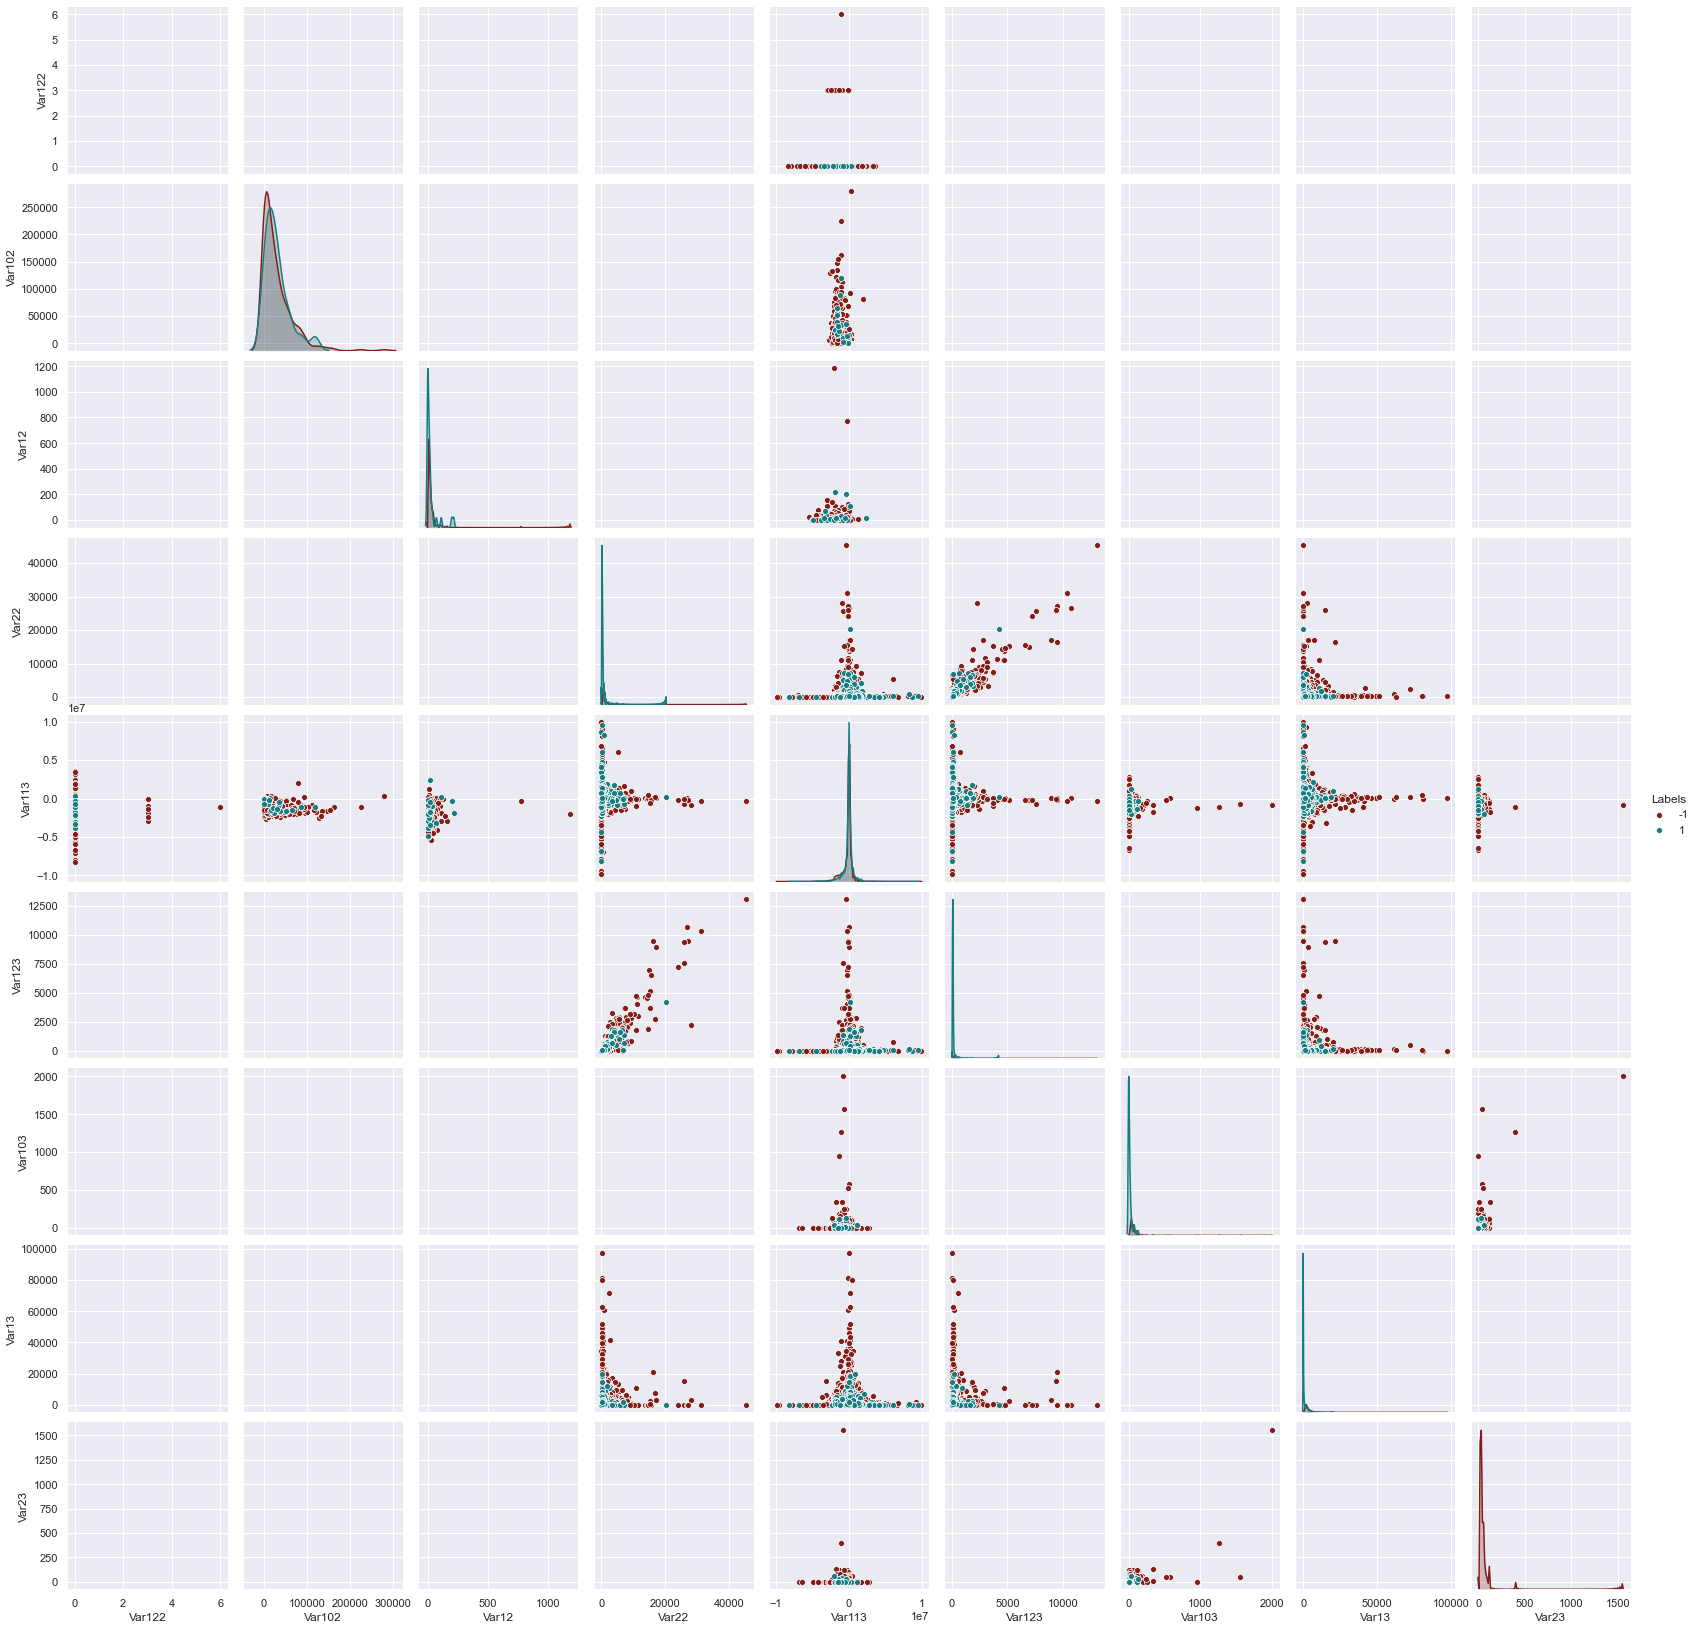

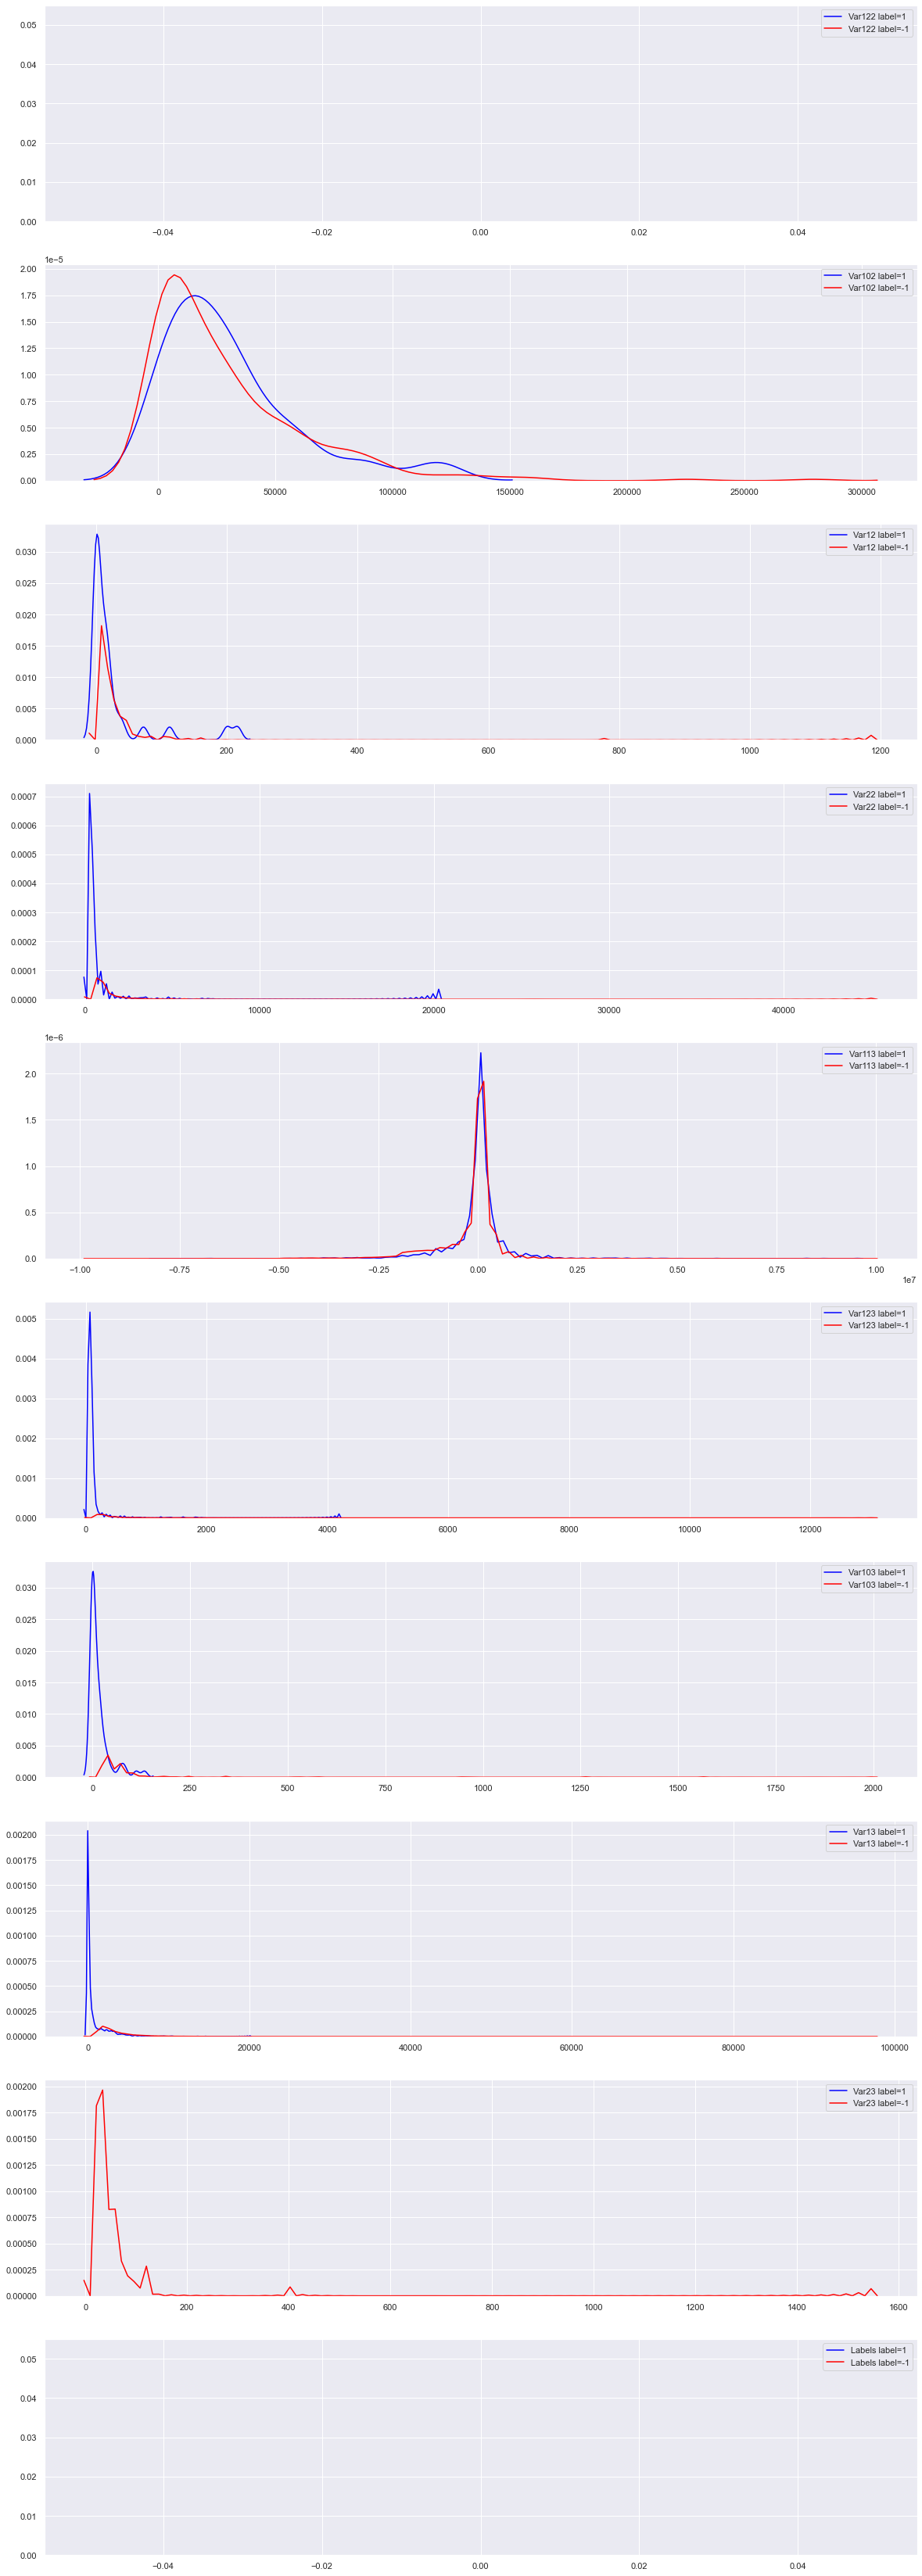

In [57]:
analyze_cols(num_params=10, array_cols=['Var112','Var122','Var102','Var12','Var22',
                                               'Var113','Var123','Var103','Var13','Var23'], train_data=train_data)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [82]:
top_10_usless_= train_data.corrwith(train_labels['Labels'],axis = 0).abs().sort_values().dropna()[:10].index
top_10_usless_

Index(['Var123', 'Var129', 'Var44', 'Var104', 'Var105', 'Var146', 'Var133',
       'Var16', 'Var181', 'Var4'],
      dtype='object')

Var123    0.000115
Var129    0.000335
Var44     0.000524
Var104    0.000711
Var105    0.000711
Var146    0.001320
Var133    0.001355
Var16     0.002033
Var181    0.002250
Var4      0.002343
dtype: float64


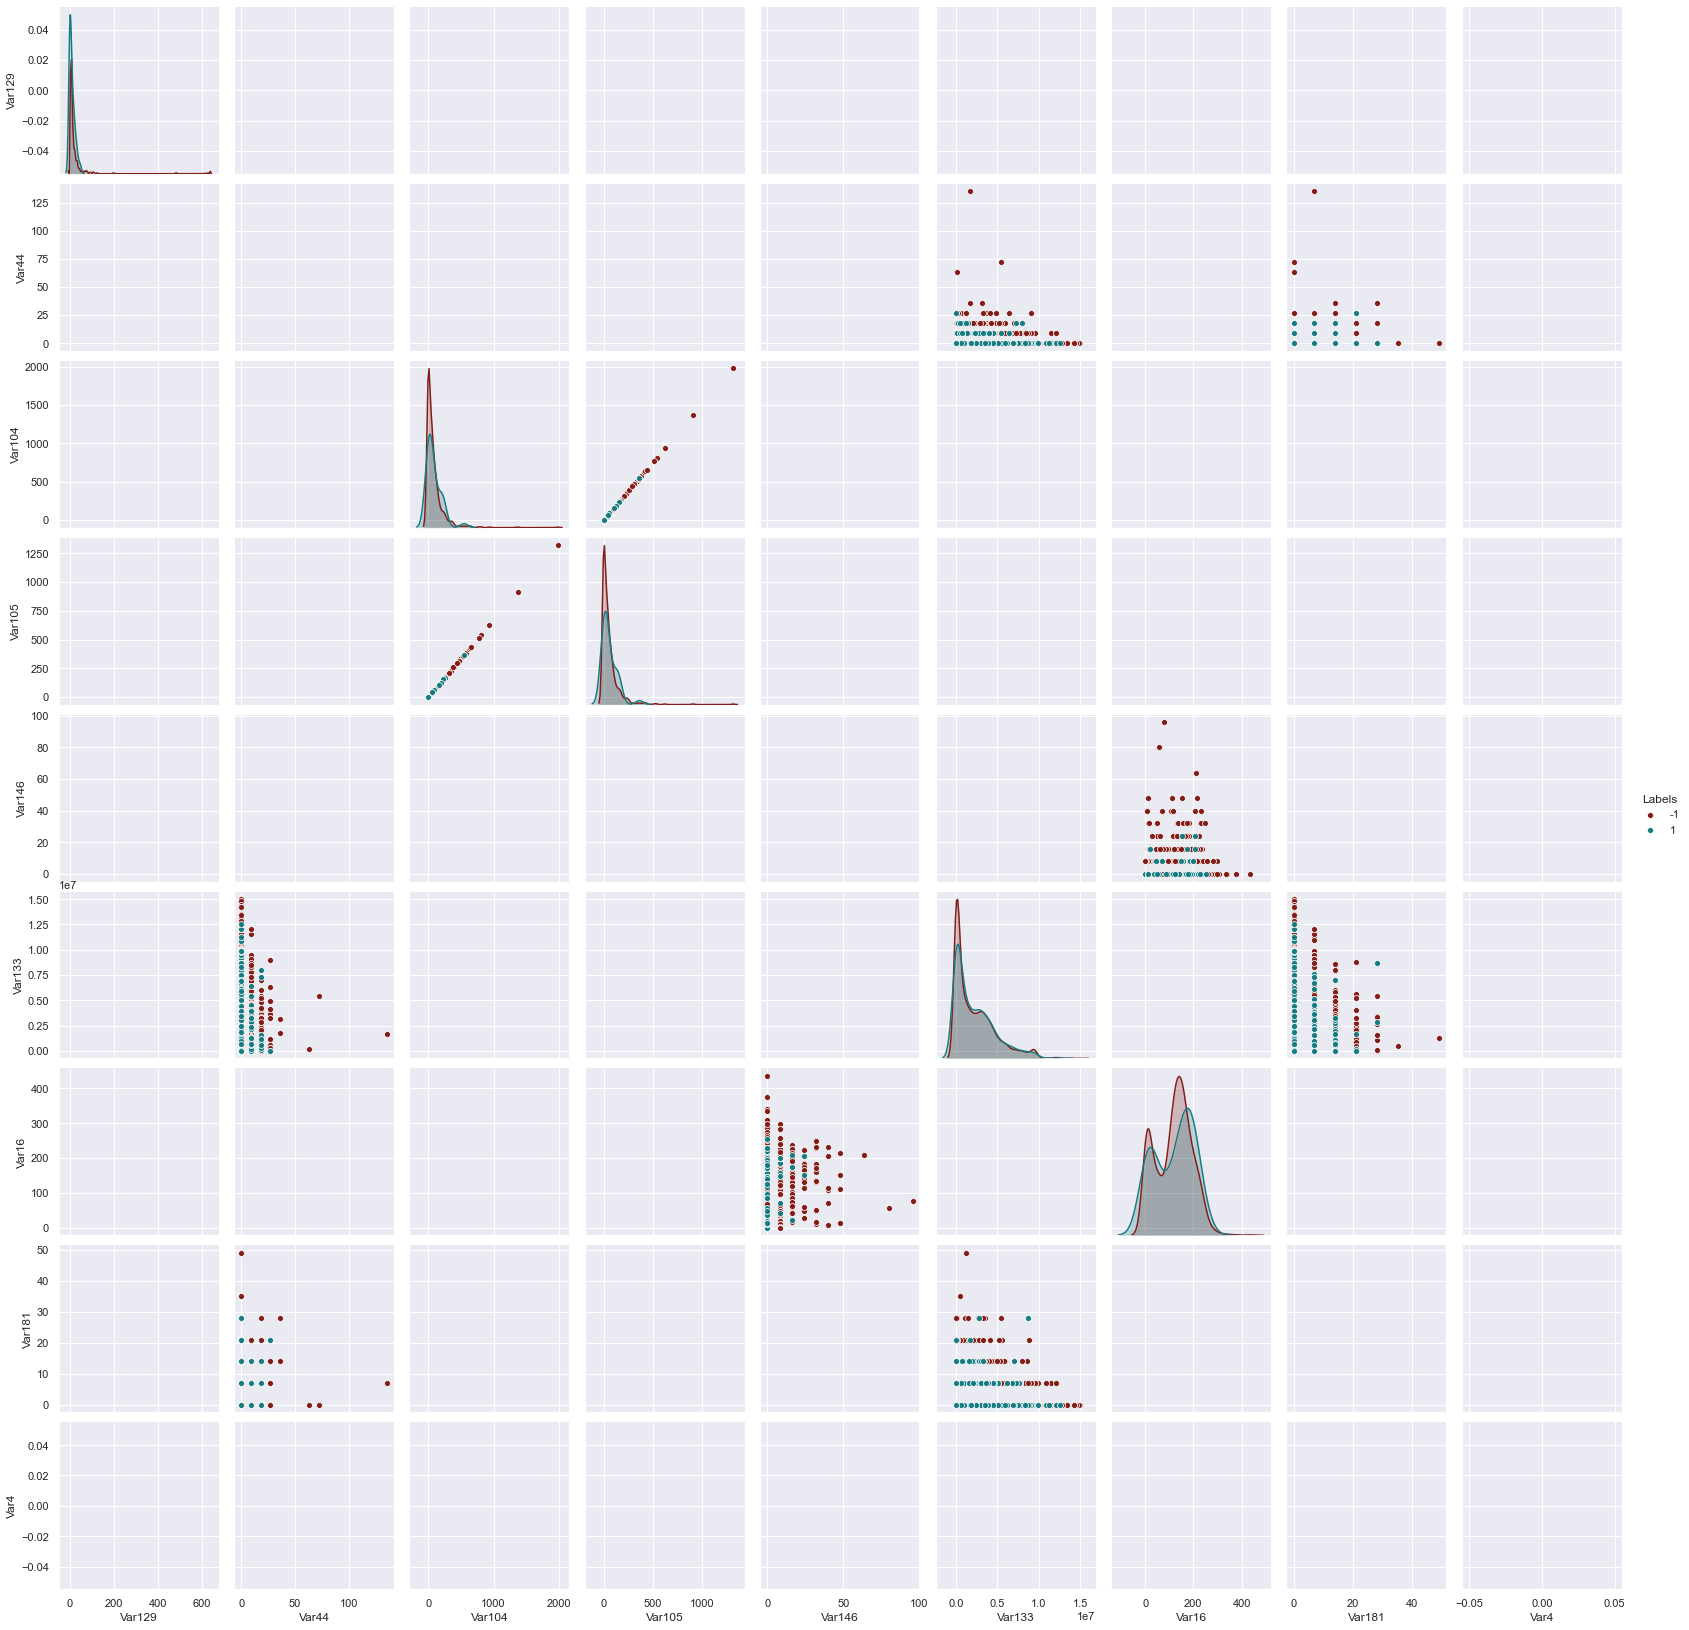

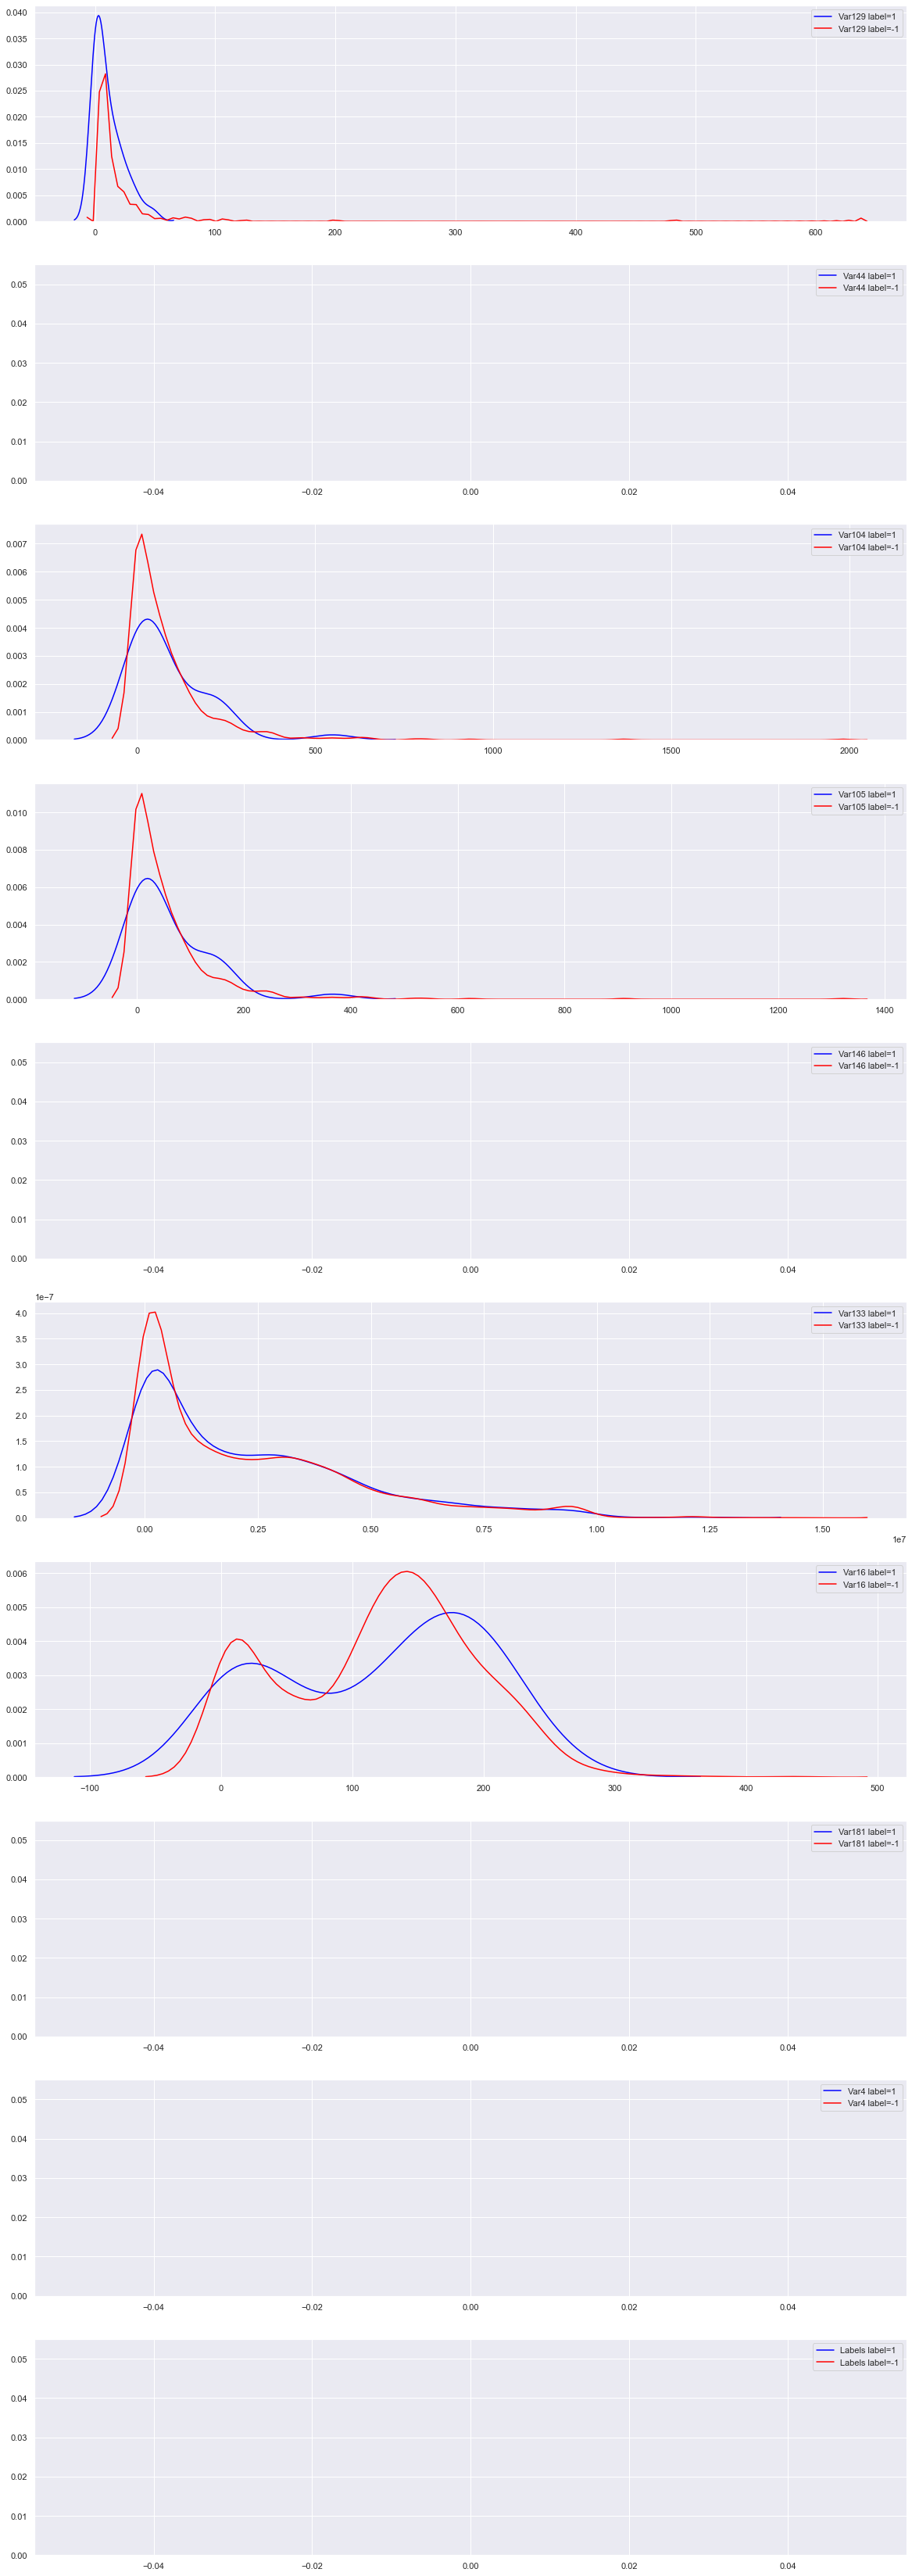

In [59]:
analyze_cols(num_params=10, array_cols=['Var123', 'Var129', 'Var44', 'Var104', 'Var105', 
                                        'Var146', 'Var133', 'Var16', 'Var181', 'Var4'], train_data=train_data)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [60]:
train_data[categorical_].describe()

,Var210,Var195,Var196,Var211,Var219,Var213,Var205,Var218,Var227,Var228,...,Var215,Var192,Var204,Var198,Var220,Var199,Var214,Var217,Var193,Var221
count,40000,40000,40000,40000,35804,890,38453,39440,40000,40000,...,563,39709,40000,40000,40000,39996,19634,39440,40000,40000
unique,6,23,4,2,22,1,3,2,7,30,...,1,354,100,3891,3891,4400,13297,12470,50,7
top,uKAI,taul,1K8T,L84s,FzaX,KdSa,VpdQ,cJvF,RAYp,F2FyR07IdsN7I,...,eGzu,DHeq9ayfAo,RVjC,fhk21Ss,4UxGlow,r83_sZi,5zARyjR,gvA6,RO12,oslk
freq,38084,38353,39633,32215,32191,890,25612,20253,28112,26211,...,563,313,1464,3557,3557,746,51,214,28817,29610


In [62]:
categorical_data=train_data[categorical_]
categorical_data["Labels"]=train_data["Labels"]

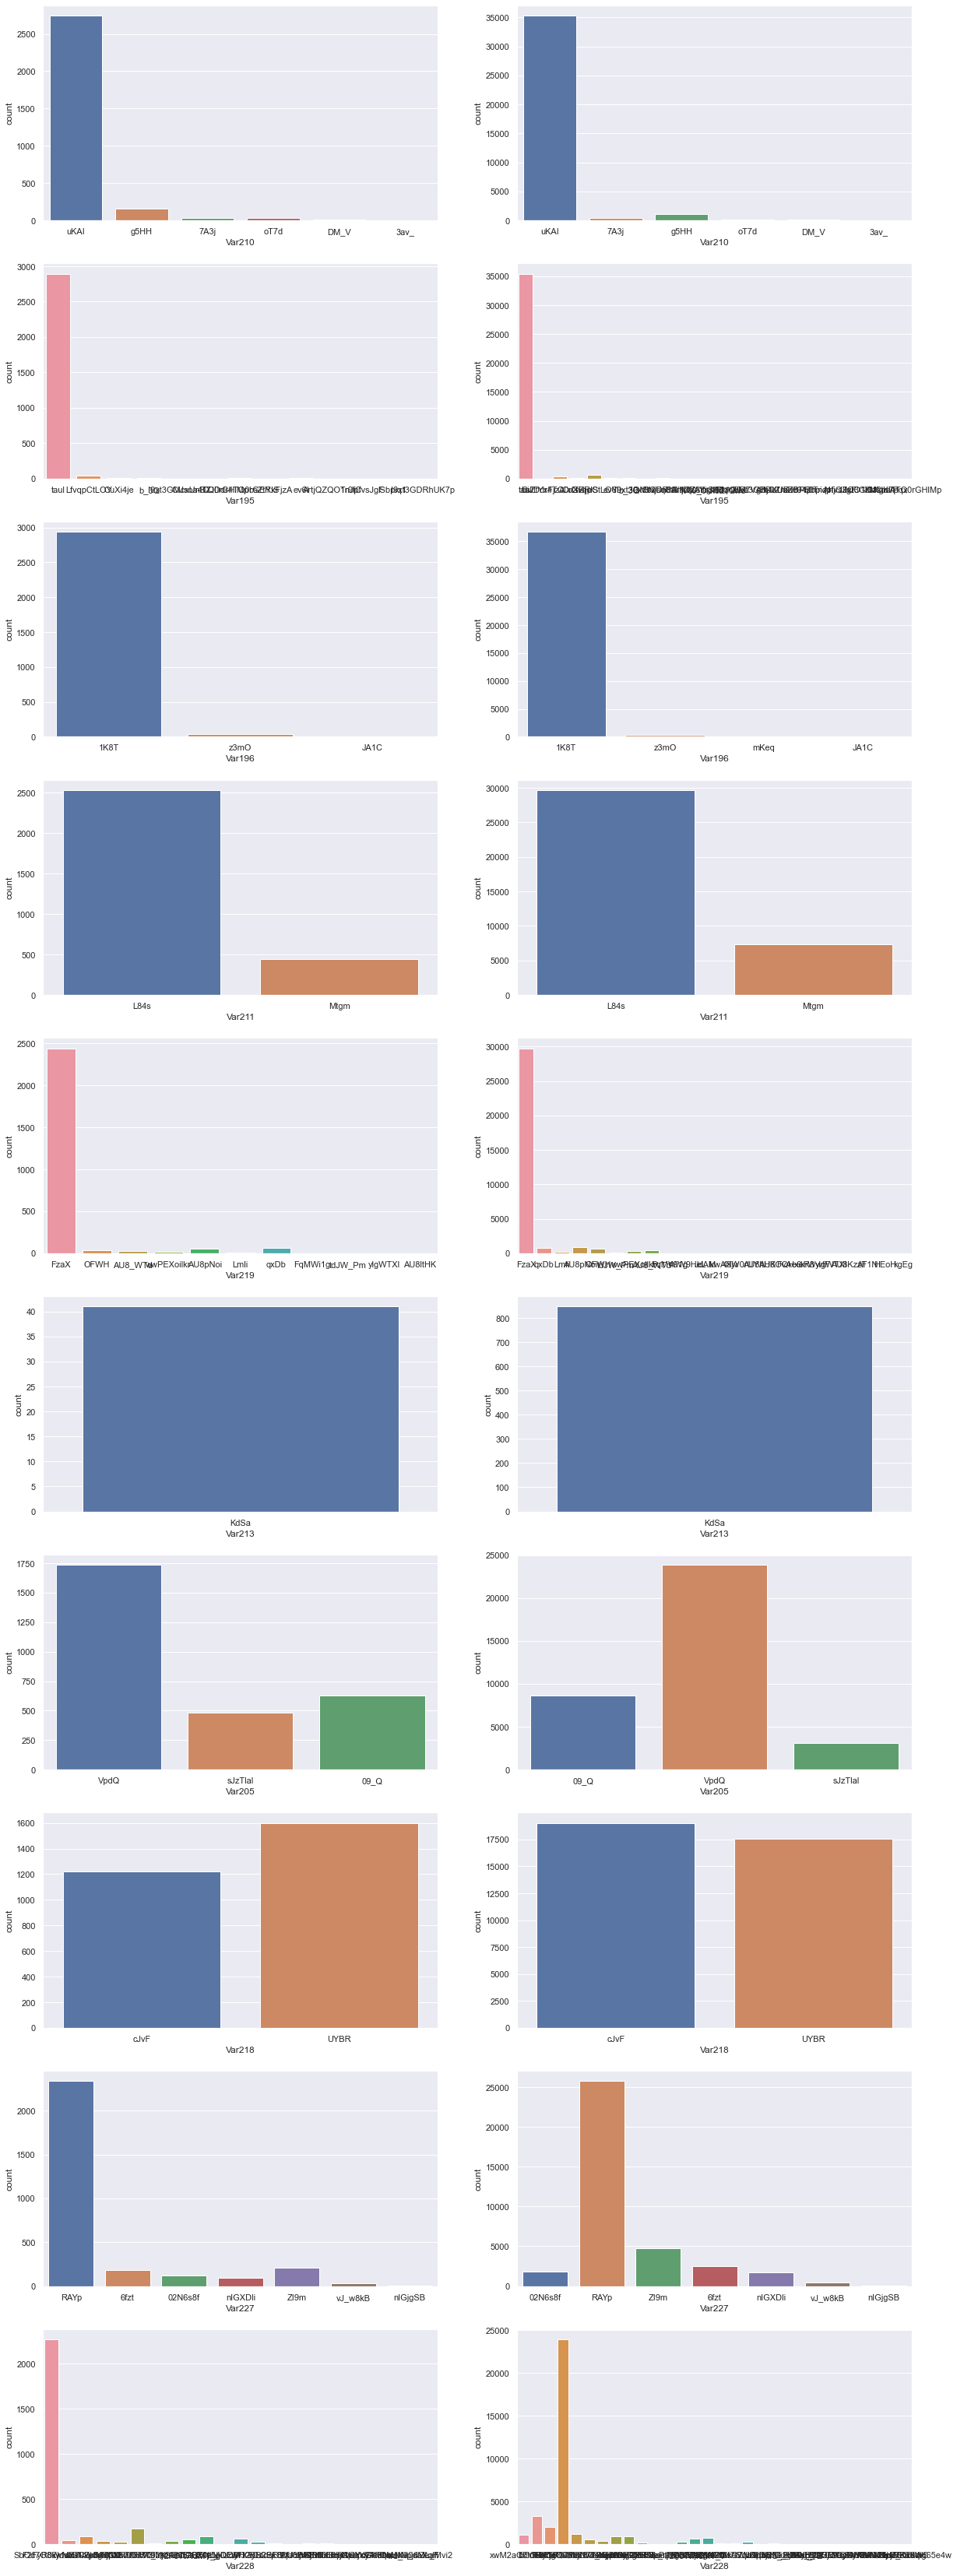

In [63]:
fig, axs = plt.subplots(10,2, figsize = (20,60))
for y in range(10):
    sns.countplot(x=categorical_data.iloc[:, y][categorical_data['Labels'] == 1], ax = axs[y,0])
    sns.countplot(x=categorical_data.iloc[:, y][categorical_data['Labels'] == -1], ax = axs[y,1])

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. Наблюдается сильная положиельная корреляция между признаками  var 114 и var 177. Меджу var105 и var104 - линейная зависимость.
2. Var 203 в позитивных сдучаях он принимает 3 значения , в негативных - 5 , уже основываясь на этом признаке ,мы может с определённой уверенностью классифицировать долю пользователей. var 142 достаточно хорошо разделяет долю людей.
3. var105 и var104 скорее всего , один признак можно выразить через другой, скорее всего , болшую часть категориальных признаков нам не дадут полезной информации ,т.к они принимают только одно значение
4. Да.